In [1]:
import numpy as np
import numpy.linalg as la
import cvxpy as cp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 24,
    })

In [9]:
def simplex_iteration(x, B, problem, verbose=False):
    """Perform one simplex iteration given 
    - basic feasible solution x
    - basis B
    
    It returns new x, new basis, and 
    termination flag (true/false)
    """
    A, b, c = problem['A'], problem['b'], problem['c']
    m, n = A.shape
    A_B = A[:, B]
    if verbose:
        print("x =", x)
        print("B =", B)
    
    # Compute reduced cost vector
    p = la.solve(A_B.T, c[B])
    c_bar = c - A.T @ p
    if verbose:
        print("c_bar", c_bar)
    
    # Check optimality
    if np.all(c_bar >= 0):
        if verbose:
            print("Optimal solution found!")
        return x, B, True

    # Choose j such that c_bar < 0 (first one)
    j = np.where(c_bar < 0)[0][0]
    if verbose:
        print("j =", j)
    
    # Compute search direction d
    d = np.zeros(n)
    d[j] = 1
    d[B] = la.solve(A_B, -A[:, j])
    if verbose:
        print("d =", d)
    
    # Check for unboundedness
    if np.all(d >= 0):
        if verbose:
            print("Unbounded problem!")
        return None, None, True
    
    # Compute step length theta
    d_i = np.where(d[B] < 0)[0]
    theta = np.min(- x[B[d_i]] / d[B[d_i]])
    i = B[d_i[np.argmin(- x[B[d_i]] / d[B[d_i]])]]
    if verbose:
        print("i = ", i)
        print("theta = ", theta)
    
    # Compute next point
    x_next = x + theta * d
    
    # Compute next basis
    B_next = B
    B_next[np.where(B == i)[0]] = j
  
    return x_next, B_next, False


In [10]:
problem = {'A': np.array([[1, 1, 1]]), 
           'b': np.array([2]),
           'c': np.array([0, 0, -1])}
x = np.array([2, 0, 0])
B = np.array([0])
y, B_bar, _ = simplex_iteration(x, B, problem, 
                                verbose=True)
print("y =", y)

x = [2 0 0]
B = [0]
c_bar [ 0.  0. -1.]
j = 2
d = [-1.  0.  1.]
i =  0
theta =  2.0
y = [0. 0. 2.]


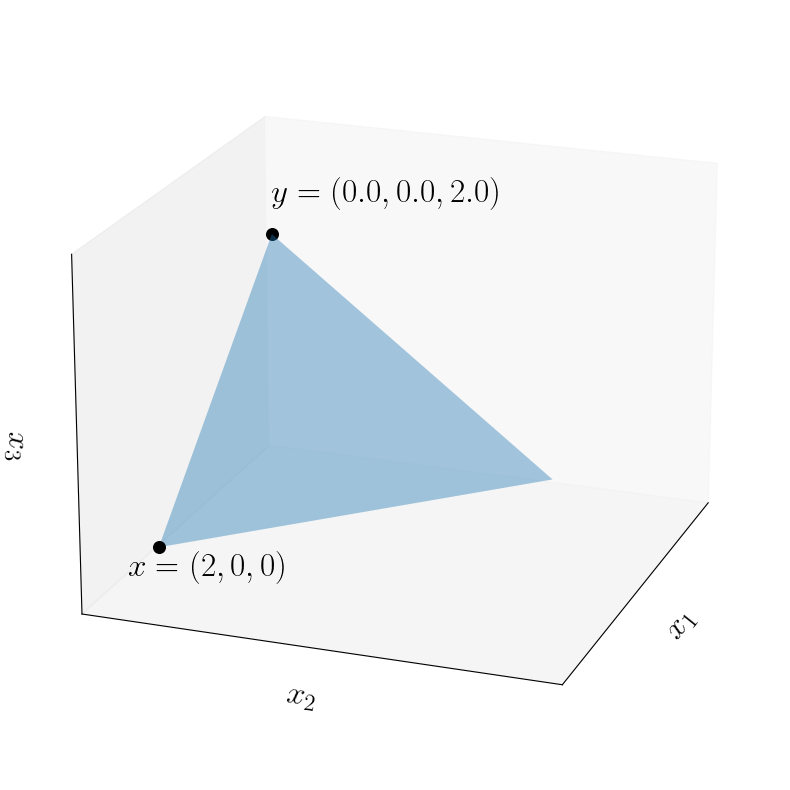

In [20]:
# Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim([0,3])
ax.set_xlabel(r"$x_1$")
ax.set_xticks([])
ax.set_ylim([0,3])
ax.set_ylabel(r"$x_2$")
ax.set_yticks([])
ax.set_zlim([0,3])
ax.set_zlabel(r"$x_3$")
ax.set_zticks([])


# Plot feasible region
vertices = np.array([[2, 0, 0],
                     [0, 2, 0],
                     [0, 0, 2]])
poly = Poly3DCollection([vertices])
poly.set_alpha(0.4)
ax.add_collection3d(poly)
ax.view_init(20, 20)


# Plot x and x_next
ax.scatter(x[0], x[1], x[2], marker='o', s=70, color='k', facecolors='k')
ax.text(2.5, 0, 0, r"$x = ({0}, {1}, {2})$".format(x[0], x[1], x[2]), color='k')

ax.scatter(y[0], y[1], y[2], marker='o', s=70, color='k', facecolors='k')
ax.text(0, 0, 2.3, r"$y = ({0}, {1}, {2})$".format(y[0], y[1], y[2]), color='k')
plt.savefig("simplex_iter_plot.pdf")